In [1]:
%matplotlib inline
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')
data = data.set_index(['ID'])

In [3]:
X_df = data.ix[:,1:]
y_df = data['target']

n = X_df.shape[0]
d = X_df.shape[1]

In [4]:
all_columns = X_df.columns.values

numeric_columns = X_df.describe().columns.values
non_numeric_columns = [x for x in all_columns if x not in numeric_columns]

float_columns = X_df.columns[X_df.dtypes == float].values
non_float_columns = X_df.columns[X_df.dtypes != float].values

# Principal Components Analysis

In [5]:
X_df = X_df.dropna()
y_df = y_df.loc[X_df.index]

X = X_df[numeric_columns].values
y = y_df.values

d = X.shape[1]

In [6]:
mean_vector = np.mean(X, axis=0) 
cov_mat = np.cov([X[:,i] for i in range(d)])

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:,i].reshape(1,d).T
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print(40 * '-')

Eigenvalue 1 from covariance matrix: 143.53885485726641
----------------------------------------
Eigenvalue 2 from covariance matrix: 72.27298616417532
----------------------------------------
Eigenvalue 3 from covariance matrix: 27.824191082184498
----------------------------------------
Eigenvalue 4 from covariance matrix: 21.503911667485742
----------------------------------------
Eigenvalue 5 from covariance matrix: 19.402319442711924
----------------------------------------
Eigenvalue 6 from covariance matrix: 16.453697078622103
----------------------------------------
Eigenvalue 7 from covariance matrix: 13.176282803681143
----------------------------------------
Eigenvalue 8 from covariance matrix: 11.231348945774416
----------------------------------------
Eigenvalue 9 from covariance matrix: 8.446830837522334
----------------------------------------
Eigenvalue 10 from covariance matrix: 7.554946813674853
----------------------------------------
Eigenvalue 11 from covariance ma

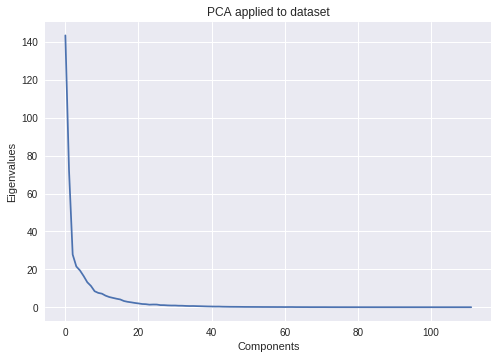

In [7]:
plt.plot(eig_val_cov)
plt.title("PCA applied to dataset")
plt.ylabel("Eigenvalues")
plt.xlabel("Components")

In [8]:
tot_eig = np.sum(eig_val_cov)
i=0
p=0.95
actual_sum_eig = eig_val_cov[i]

while actual_sum_eig < tot_eig * p:
    i+=1
    actual_sum_eig += eig_val_cov[i]
print ("With a %0.2f threshold, we reduct %d dimensions to %d dimensions." % (p, len(numeric_columns), i+1))
reduced_eigvec_cov = eig_vec_cov[:,:i]

With a 0.95 threshold, we reduct 112 dimensions to 23 dimensions.


In [9]:
X_reduced = np.dot(X,reduced_eigvec_cov)

In [10]:
ind1 = np.where(y==1)
ind0 = np.where(y==0)

# Etude relation à la target après PCA

In [11]:
n1 = np.sum(y_df)

#print("Number of lines: {}".format(n))
print("Percentage of 1: {}".format(n1/n))
print("Percentage of 0: {}". format(1-n1/n))

Percentage of 1: 0.10849275286255369
Percentage of 0: 0.8915072471374463


In [12]:
from scipy.stats import entropy

EPSILON = 10e-10

col_inf = []
th = 0.01
KL = []
KL_inf = []

for i in range(X_reduced.shape[1]):
       
    c = np.array([v for v in X_reduced[:,i]])
    cmin = np.min(c)
    cmax = np.max(c)

    c1 = np.array([v for v in X_reduced[ind1,i]])
    p1 = np.histogram(c1, range=(cmin,cmax), bins=21, normed=True)[0]
    
    c0 = np.array([v for v in X_reduced[ind0,i]])
    p0 = np.histogram(c0, range=(cmin,cmax), bins=21, normed=True)[0]
    
    #KL distance   
    p1 += EPSILON
    p0 += EPSILON
    KL.append(entropy(p1,p0))    
    if entropy(p1,p0) > th:
        KL_inf.append(entropy(p1,p0))
        col_inf.append(i)

Column 0
KL: 0.011089097374215134


/home/corbi/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


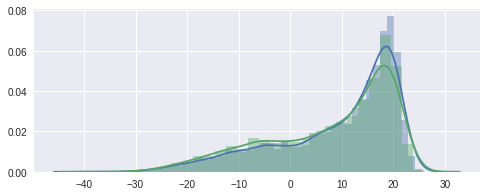

Column 3
KL: 0.011369780440198683


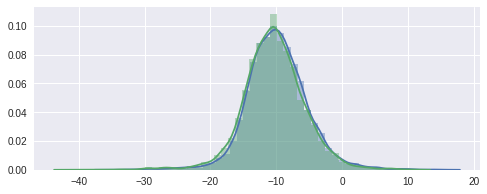

Column 4
KL: 0.031472028036567457


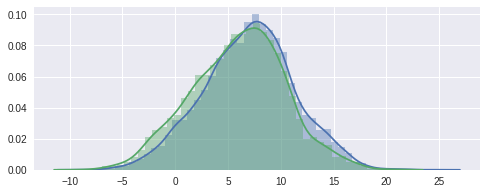

Column 17
KL: 0.010273856676307765


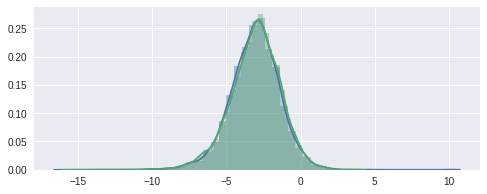

Column 18
KL: 0.010617539873743222


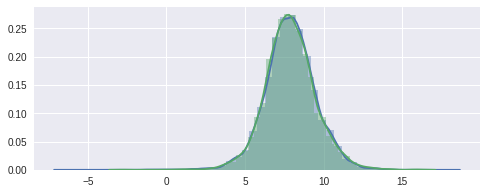

In [13]:
for i,col in enumerate(col_inf):    
    c1 = np.array([v for v in X_reduced[ind1,col]])  
    c0 = np.array([v for v in X_reduced[ind0,col]])
    print("Column {}".format(col))
    print("KL: {}".format(KL_inf[i]))
    fig, ax = plt.subplots(figsize=(8,3)) 
    sns.distplot(c1, ax=ax)
    sns.distplot(c0, ax=ax)
    plt.show()

In [14]:
col_inf

[0, 3, 4, 17, 18]